### Task 5
What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

***Strategy***
- review delayed flights
- determine delay vs not delayed
- given delayed - departure delay vs no departure
- given depature delay - delayed or not delayed

In [57]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('lof.csv')

In [35]:
df.head(1)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-10-04,WN,WN,WN,1772,WN,N214WN,1772,14679,SAN,...,1.0,1182.0,0.0,0.0,0.0,0.0,0.0,1828.0,0.0,0.0


In [36]:
#Excluding cancelled flights
df = df[df.cancelled == 0]

In [37]:
#Extract just information on dep_delay and arr_delay
df_taskfive = df[["arr_delay", "dep_delay"]]

percent of flights that are have delayed arrivals

In [38]:
del_arrivals = len(df[df.arr_delay > 0])

In [39]:
total_arrivals = len(df)

percent of flights that are have delayed departures

In [40]:
del_deldepartures = len(df[df.dep_delay > 0])

In [41]:
total_depatures = total_arrivals

Look at only flights with delayed depatures and determine how many are delayed arrivals

In [42]:
df_deldep = df[df.dep_delay > 0]
both_delayed = len(df_deldep[df_deldep.arr_delay > 0])
only_dep = len(df_deldep) - both_delayed

Look at only flights with delayed arrivals and determine how many are delayed depatures

In [43]:
df_delarr = df[df.arr_delay > 0]
both_delayed_2 = len(df_deldep[df_deldep.dep_delay > 0])
only_arr = len(df_delarr) - both_delayed_2

Review the findings - numerically and graphically

In [44]:
print("the total number of flights(excluding cancelled) is: ", total_depatures)
print("looking at delayed departures...")
print("the total number of flights that experienced delayed depatures was: ",del_deldepartures, 
      " or ", round(del_deldepartures/total_depatures*100,2), "%")
print("of these ",del_deldepartures, " delayed depatures there were: ", both_delayed, " or ",
     round(both_delayed/del_deldepartures*100,2), "% that had delayed arrivals")
print("looking at delayed arrivals ... ")
print("the total number of flights that experienced delayed arrivals was: ",del_arrivals, 
      " or ", round(del_arrivals/total_depatures*100,2), "%")
print("of which there were: ", both_delayed_2, " or ",round(both_delayed_2/del_arrivals*100,2),
      "% that had delayed departures")

the total number of flights(excluding cancelled) is:  4890841
looking at delayed departures...
the total number of flights that experienced delayed depatures was:  1649798  or  33.73 %
of these  1649798  delayed depatures there were:  1204460  or  73.01 % that had delayed arrivals
looking at delayed arrivals ... 
the total number of flights that experienced delayed arrivals was:  1700139  or  34.76 %
of which there were:  1649798  or  97.04 % that had delayed departures


---

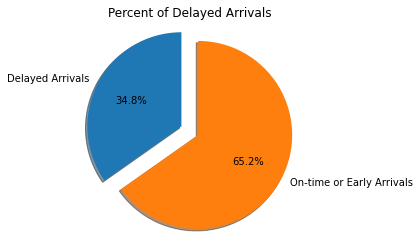

In [45]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Delayed Arrivals', 'On-time or Early Arrivals'
sizes = [del_arrivals, total_arrivals-del_arrivals]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent of Delayed Arrivals')
plt.show()

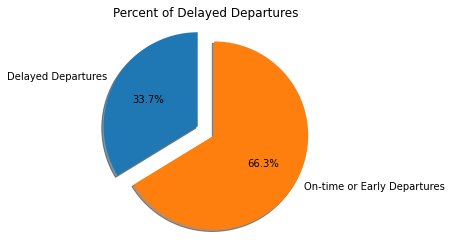

In [46]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Delayed Departures', 'On-time or Early Departures'
sizes = [del_deldepartures, total_arrivals-del_deldepartures]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent of Delayed Departures')
plt.show()

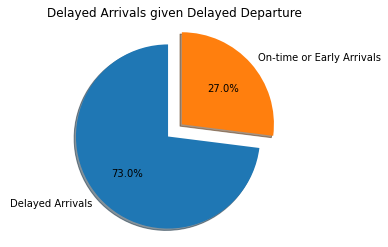

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Delayed Arrivals', 'On-time or Early Arrivals'
sizes = [both_delayed, del_deldepartures-both_delayed]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Delayed Arrivals given Delayed Departure')
plt.show()

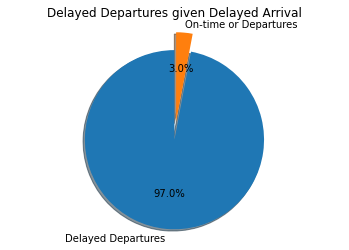

In [48]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Delayed Departures', 'On-time or Departures'
sizes = [both_delayed_2, del_arrivals-both_delayed_2]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Delayed Departures given Delayed Arrival')
plt.show()

### Task 7
Test the hypothesis whether planes fly faster when there is the departure delay? 

***Strategy***
- determine the speed of the airplane based on air_time and distance
- perform ttest to see if the plane flys faster given a departure delay

In [49]:
df_taskseven = df[["dep_delay","air_time", "distance"]]

In [50]:
df_taskseven.head()

,dep_delay,air_time,distance
0,-2.0,151.0,1182.0
1,-8.0,128.0,1149.0
2,30.0,59.0,343.0
3,-7.0,129.0,1011.0
4,-2.0,194.0,1399.0


In [18]:
def get_flight_speed(time, distance):
    """Takes in air_time (in minutes) and distance (in miles)
    Returns average flight speed in (mile/hr)"""
    
    speed = distance / time *60
    
    return speed

In [52]:
df_taskseven["average_fl_speed"] = df_taskseven.apply(lambda x: get_flight_speed(x.air_time, x.distance), axis=1)

In [53]:
df_taskseven.head()

,dep_delay,air_time,distance,average_fl_speed
0,-2.0,151.0,1182.0,469.668874
1,-8.0,128.0,1149.0,538.593750
2,30.0,59.0,343.0,348.813559
3,-7.0,129.0,1011.0,470.232558
4,-2.0,194.0,1399.0,432.680412


In [54]:
df_taskseven_nodelay = df_taskseven[df_taskseven.dep_delay <= 0 ]
df_taskseven_delay = df_taskseven[df_taskseven.dep_delay > 0 ]

In [55]:
df_taskseven_nodelay.describe()

,dep_delay,air_time,distance,average_fl_speed
count,3.241043e+06,3.241043e+06,3.241043e+06,3.241043e+06
mean,-5.007132e+00,1.052847e+02,7.468751e+02,3.955920e+02
std,3.527369e+00,6.881027e+01,5.786339e+02,7.408773e+01
min,-8.700000e+01,5.000000e+00,3.100000e+01,3.184615e+01
25%,-7.000000e+00,5.600000e+01,3.340000e+02,3.497561e+02
50%,-5.000000e+00,8.600000e+01,5.880000e+02,4.023529e+02
75%,-2.000000e+00,1.330000e+02,9.780000e+02,4.469492e+02
max,0.000000e+00,6.960000e+02,5.095000e+03,3.696000e+03


In [56]:
df_taskseven_delay.describe()

,dep_delay,air_time,distance,average_fl_speed
count,1.649798e+06,1.649798e+06,1.649798e+06,1.649798e+06
mean,3.464662e+01,1.129058e+02,8.152192e+02,4.054049e+02
std,4.508752e+01,7.086985e+01,5.990869e+02,7.447684e+01
min,1.000000e+00,4.000000e+00,3.100000e+01,5.277108e+01
25%,6.000000e+00,6.100000e+01,3.690000e+02,3.609231e+02
50%,1.700000e+01,9.400000e+01,6.500000e+02,4.131429e+02
75%,4.400000e+01,1.430000e+02,1.055000e+03,4.565432e+02
max,1.440000e+03,6.910000e+02,5.095000e+03,7.991489e+02


In [58]:
nodelay_speed = df_taskseven_nodelay.average_fl_speed
delay_speed = df_taskseven_delay.average_fl_speed

In [59]:
if len(nodelay_speed) == len(delay_speed): 
    print("equal sample sizes")
elif len(nodelay_speed) > len(delay_speed):
    nodelay_speed = nodelay_speed.sample(len(delay_speed))
    print("sample taken of nodelay_speed")
else:
    delay_speed = delay_speed.sample(len(nodelay_speed))
    print("sample taken of delay_speed")

sample taken of nodelay_speed


In [60]:
results = st.mstats.ttest_ind(nodelay_speed,delay_speed)

In [61]:
if results[1] > 0.05:
    print("insufficent evidence to reject null hypothesis, ie. flights with delayed departures do not fly faster")
else: 
    print("strong evidence to support rejecting null hypothesis ie. flights with delayed depatures possibly fly faster")

strong evidence to support rejecting null hypothesis ie. flights with delayed depatures possibly fly faster


In [62]:
df_taskseven.to_csv("taskseven.csv", index=False)

In [63]:
df_taskfive.to_csv("taskfive.csv", index=False)